# Exercise 5.01: Ordinary Least Squares (OLS) as a Classifier

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Datasets/linear_classifier.csv')
df.head()

,x,y,labels
0,1,13,x
1,8,18,o
2,9,25,x
3,5,25,x
4,4,17,x


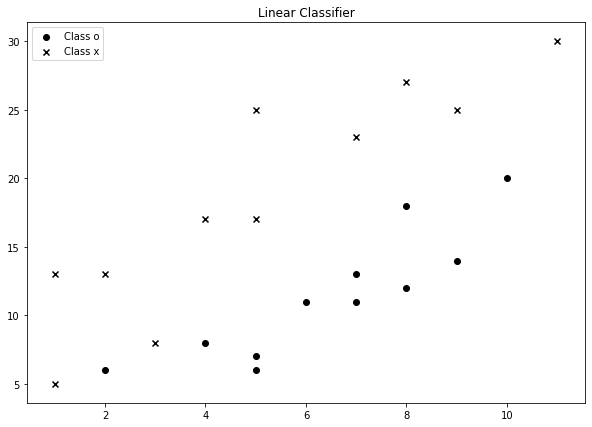

In [3]:
plt.figure(figsize=(10, 7))
for label, label_class in df.groupby('labels'):
    plt.scatter(label_class.values[:,0], label_class.values[:,1],
                label=f'Class {label}', marker=label, c='k')
plt.legend()
plt.title("Linear Classifier");

In [4]:
df_train, df_test = train_test_split(df.copy(), test_size=0.4, random_state=12)

In [5]:
# Fit a linear regression model
model = LinearRegression()
model.fit(df_train.x.values.reshape((-1, 1)), df_train.y.values.reshape((-1, 1)))

# Print out the parameters
print(f'y = {model.coef_[0][0]}x + {model.intercept_[0]}')

y = 1.2718120805369124x + 8.865771812080538


/Users/ashish.jha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


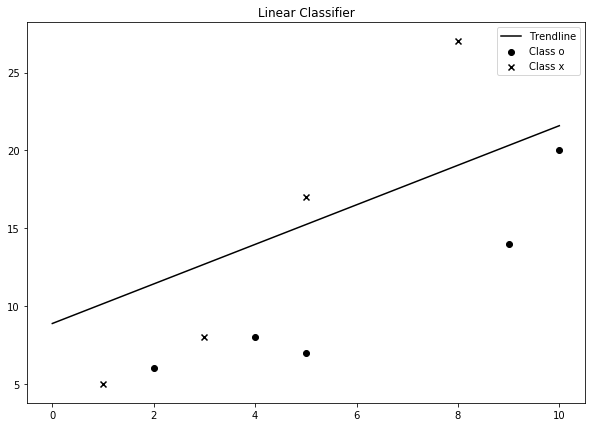

In [6]:
# Plot the trendline
trend = model.predict(np.linspace(0, 10).reshape((-1, 1)))

plt.figure(figsize=(10, 7))
for label, label_class in df_test.groupby('labels'):
    plt.scatter(label_class.values[:,0], label_class.values[:,1],
                label=f'Class {label}', marker=label, c='k')
plt.plot(np.linspace(0, 10), trend, c='k', label='Trendline')
plt.legend()
plt.title("Linear Classifier");

In [7]:
# Make predictions
y_pred = model.predict(df_test.x.values.reshape((-1, 1)))
pred_labels = []

for _y, _y_pred in zip(df_test.y, y_pred):
    if _y < _y_pred:
        pred_labels.append('o')
    else:
        pred_labels.append('x')
df_test['Pred Labels'] = pred_labels
df_test.head()

,x,y,labels,Pred Labels
7,4,8,o,o
10,5,17,x,x
21,3,8,x,o
15,1,5,x,o
14,9,14,o,o


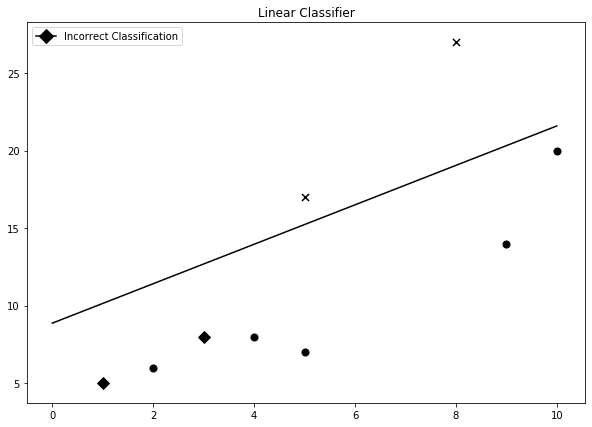

In [8]:
plt.figure(figsize=(10, 7))
for idx, label_class in df_test.iterrows():
    if label_class.labels != label_class['Pred Labels']:
        label = 'D'
        s=70
    else:
        label = label_class.labels
        s=50
    plt.scatter(label_class.values[0], label_class.values[1],
                label=f'Class {label}', marker=label, c='k', s=s)
      
plt.plot(np.linspace(0, 10), trend, c='k', label='Trendline')
plt.title("Linear Classifier");

incorrect_class = mlines.Line2D([], [], color='k', marker='D',
                          markersize=10, label='Incorrect Classification');
plt.legend(handles=[incorrect_class]);